In [8]:
%pip install datasets matplotlib scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [15]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

dataset = load_dataset("cifar10")

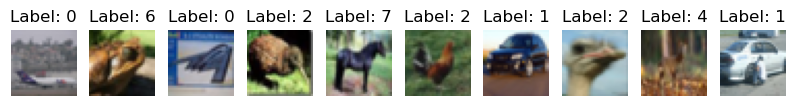

In [16]:
def show_images(images, labels, num_images=10):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

images_display = 10
images = [dataset['train'][i]['img'] for i in range(images_display)]
labels = [dataset['train'][i]['label'] for i in range(images_display)]

show_images(images, labels, num_images=images_display)

In [17]:
def convert_to_array(dataset_split):
    images = []
    labels = []
    for item in dataset_split:
        image = np.array(item['img'])
        label = item['label']
        images.append(image.flatten())
        labels.append(label)
    return np.array(images), np.array(labels)

x, y = convert_to_array(dataset['train'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

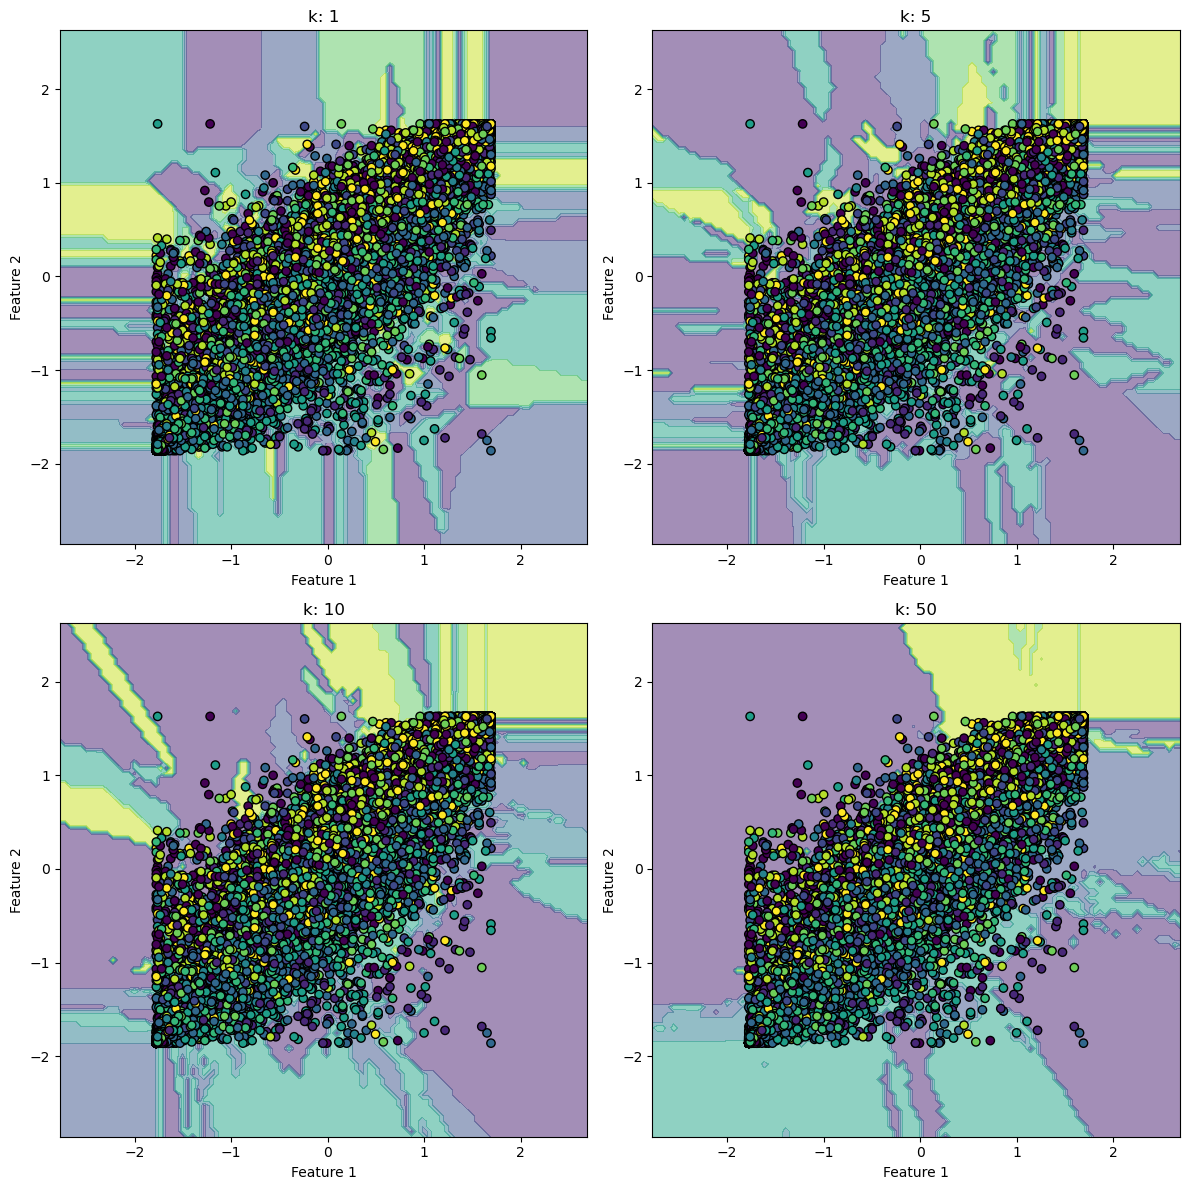

In [18]:
# Cell 5: Plot decision boundaries for kNN classifiers for various values of k
k_values = [1, 5, 10, 50]
plot_kwargs = {'cmap': 'viridis', 'alpha': 0.5, 'grid_resolution': 100}

# Create a figure with 2 rows and 2 columns
figure, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate(k_values):
    ax = axes[i // 2, i % 2]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train[:, :2], y_train)  # Using only the first 2 features for visualization

    DecisionBoundaryDisplay.from_estimator(knn, x_train[:, :2], ax=ax, **plot_kwargs)

    scatter = ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', label='Training data')
    ax.set_title(f'k: {k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

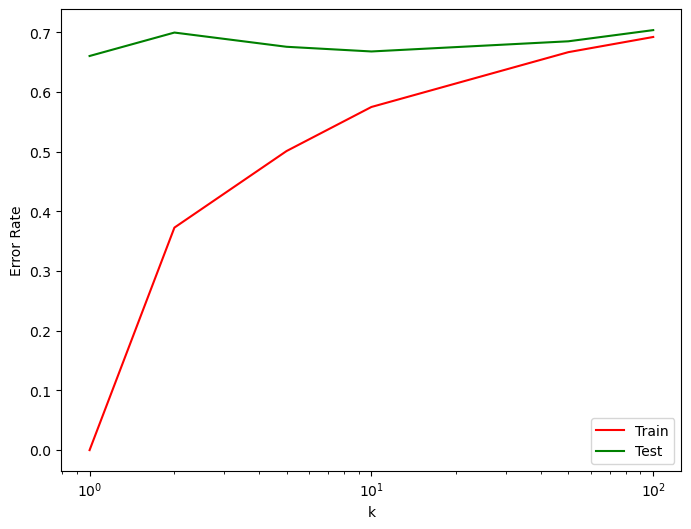

In [19]:
# Cell 6: Plot training and testing errors for various values of k
figure, ax = plt.subplots(1, figsize=(8, 6))

k_values = [1, 2, 5, 10, 50, 100]
training_errors = []
testing_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    training_predictions = knn.predict(x_train)
    testing_predictions = knn.predict(x_test)
    
    training_accuracy = accuracy_score(y_train, training_predictions)
    testing_accuracy = accuracy_score(y_test, testing_predictions)
    
    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

ax.semilogx(k_values, training_errors, linestyle='-', color='red', label='Train')
ax.semilogx(k_values, testing_errors, linestyle='-', color='green', label='Test')
ax.set_xlabel('k')
ax.set_ylabel('Error Rate')
ax.legend()

plt.show()